### Step 1: Importing dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Step 2: Data preprocessing

In [3]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
# let rename the column
df.rename(columns={'#Passengers':'Air_Passangers'},inplace=True)

In [6]:
df.head()

,Month,Air_Passangers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Month           144 non-null    object
 1   Air_Passangers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Prophet also imposes the strict condition that the input columns must be named as ds (the time column) and y (the metric column).

In [8]:
df.rename(columns={'Month':'ds','Air_Passangers':'y'},inplace=True)

In [9]:
df.head(3)

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132


### Step 3: Visualization of data

<Axes: >

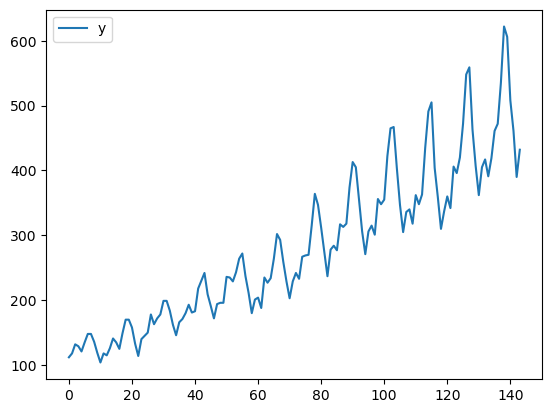

In [10]:
df.plot()

### Step 4: Time series forecasting with prophet

To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [11]:
from prophet import Prophet

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

my_model = Prophet(interval_width=0.95)

In [13]:
my_model.fit(df)

10:13:40 - cmdstanpy - INFO - Chain [1] start processing
10:13:40 - cmdstanpy - INFO - Chain [1] done processing


In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions.

Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function.

In [27]:
future_dates=my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [16]:
# when working with time series it is important to consier frequency of our time series

# Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month).

# Therefore, the make_future_dataframe generated 36 monthly timestamps for us.

# In other words, we are looking to predict future values of our time series 3 years into the future.

# The DataFrame of future dates is then used as input to the predict method of our fitted model.

In [18]:
forecast=my_model.predict(future_dates)

In [21]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,85.864195,40.991665,126.937338
1,1949-02-01,79.337026,35.175318,122.384751
2,1949-03-01,110.907300,66.082389,151.662295
3,1949-04-01,108.539291,65.724388,152.844052
4,1949-05-01,111.894105,67.251640,157.699198


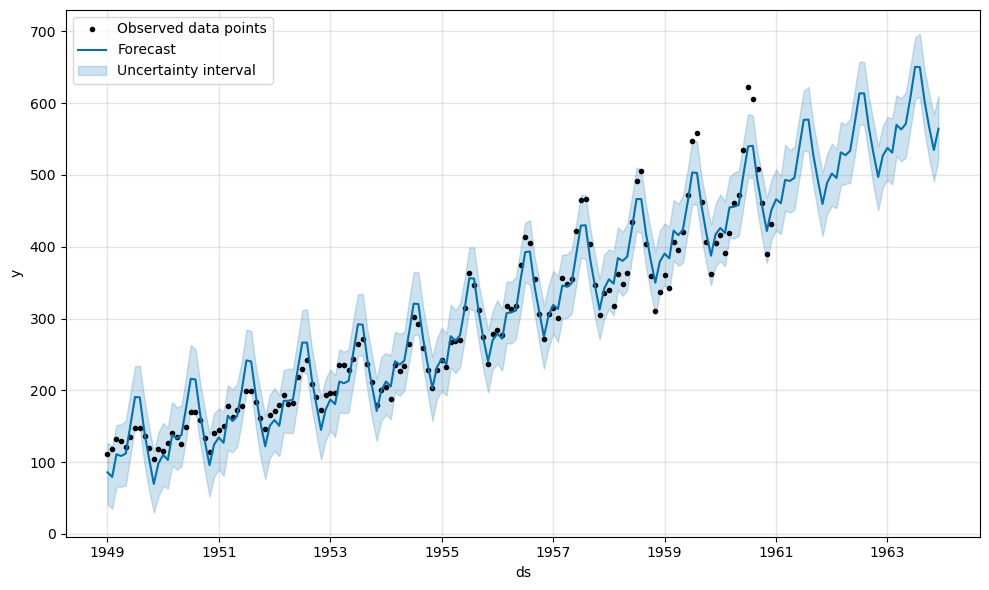

In [28]:
my_model.plot(forecast,uncertainty=True);
plt.legend()

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

### Step 5: Plotting the forcasting componenets

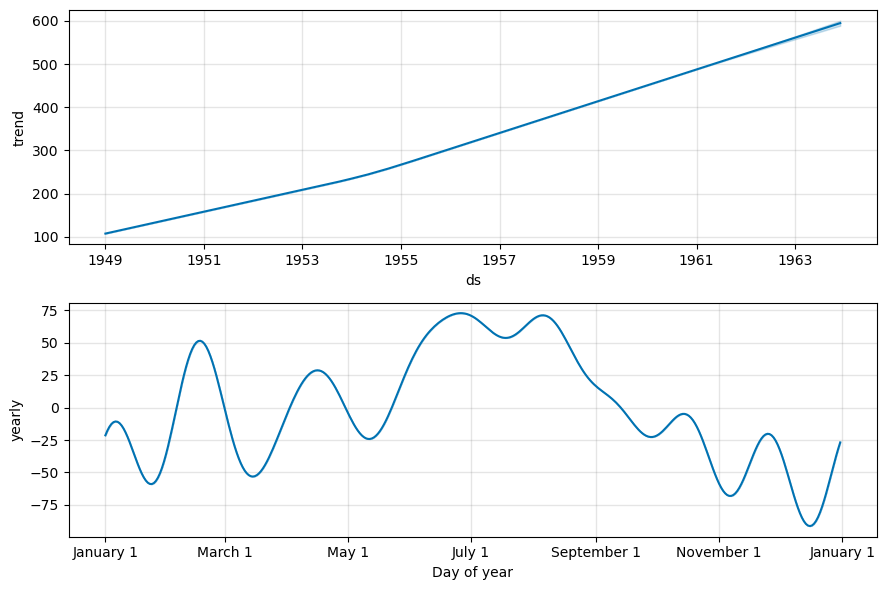

In [25]:
my_model.plot_components(forecast);